In [1]:
import dill as pickle
import pandas as pd
import numpy as np
from cosinorage.dataloaders import UKBDataLoader, plot_enmo
from cosinorage.features import WearableFeatures, plot_cosinor, plot_sleep_predictions
from sklearn.preprocessing import MinMaxScaler

%load_ext autoreload
%autoreload 2

In [2]:
reload_ukb = False

In [3]:
if reload_ukb:
    qa_file_path = '../data/ukb/UKB Acc Quality Control.csv'
    enmo_file_dir = '../data/ukb/UKB Sample Data/1_raw5sec_long'
    eid = 1000160

    ukb_loader = UKBDataLoader(qa_file_path=qa_file_path, ukb_file_dir=enmo_file_dir, eid=eid)
    ukb_loader.load_data(verbose=True)
    with open('../data/ukb/ukb_loader.pkl', 'wb') as f:
        pickle.dump(ukb_loader, f)
else:
    with open('../data/ukb/ukb_loader.pkl', 'rb') as f:
        ukb_loader = pickle.load(f)


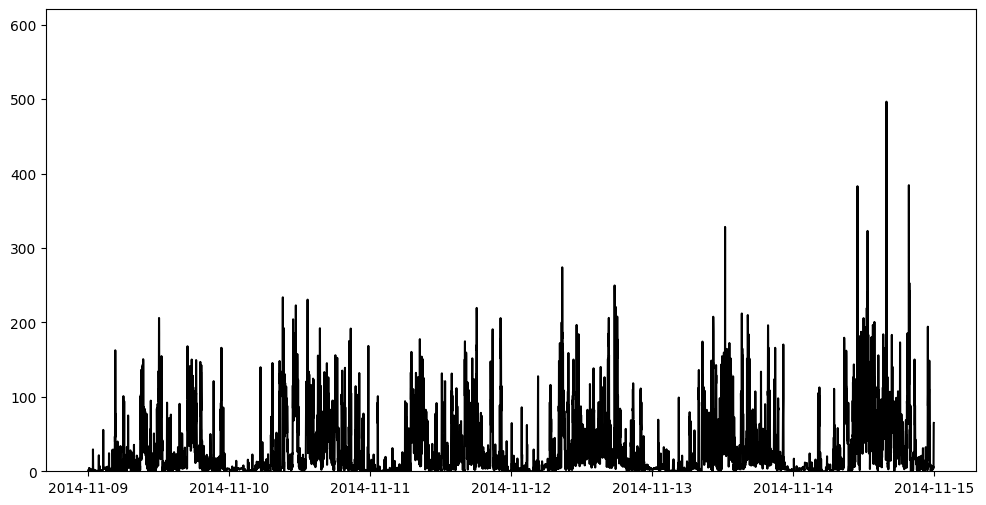

In [4]:
plot_enmo(ukb_loader)

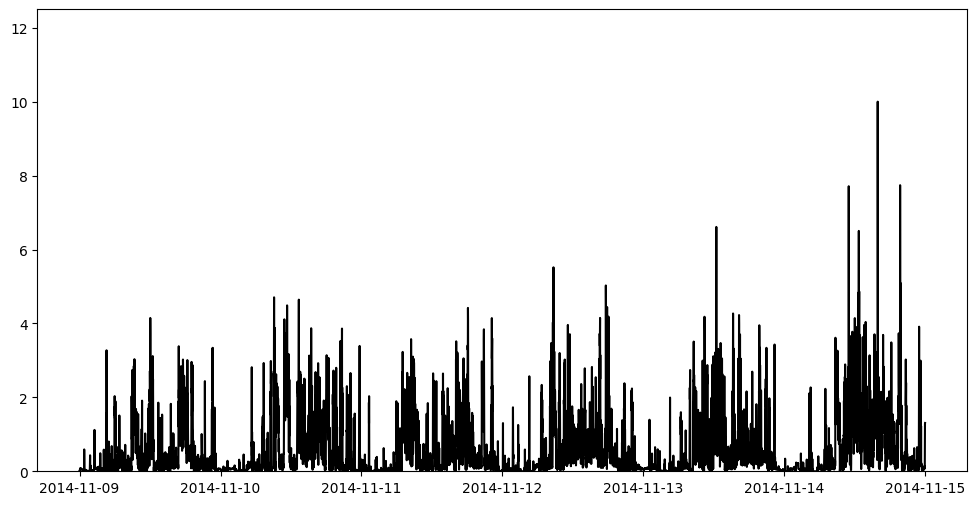

In [5]:
min_max_scaler = MinMaxScaler(feature_range=(0, 10))
ukb_loader.enmo_df[['ENMO']] = min_max_scaler.fit_transform(ukb_loader.enmo_df[['ENMO']])
plot_enmo(ukb_loader)

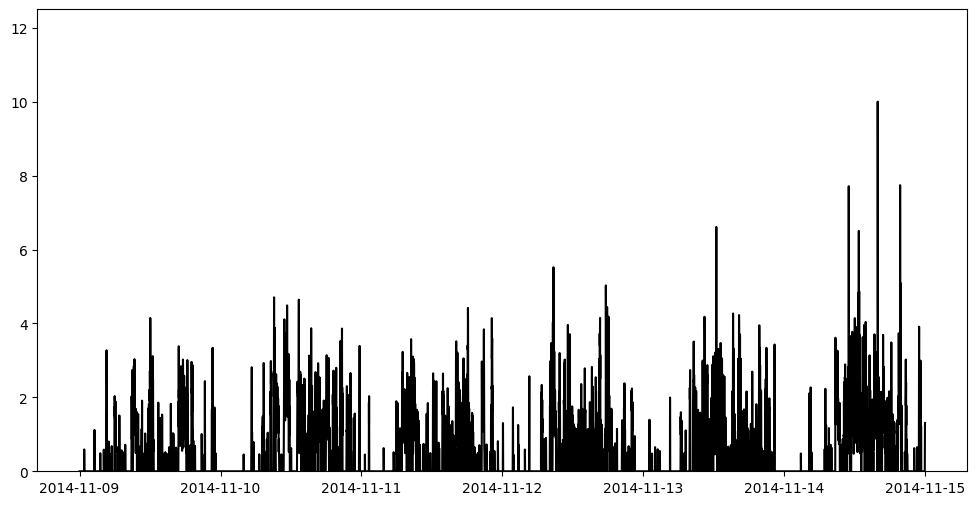

In [6]:
# reset values in the lowest 10% to 0
ukb_loader.enmo_df.loc[ukb_loader.enmo_df['ENMO'] < 0.43, 'ENMO'] = 0
plot_enmo(ukb_loader)


/Users/jacobleooskar/Documents/Education/ETHZ/Curriculum/Semester03/03SemProj/CosinorAge/cosinorage/features/utils/cosinor_analysis.py:60: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  fitted_vals_df = pd.concat([fitted_vals_df, model.fittedvalues], ignore_index=False)


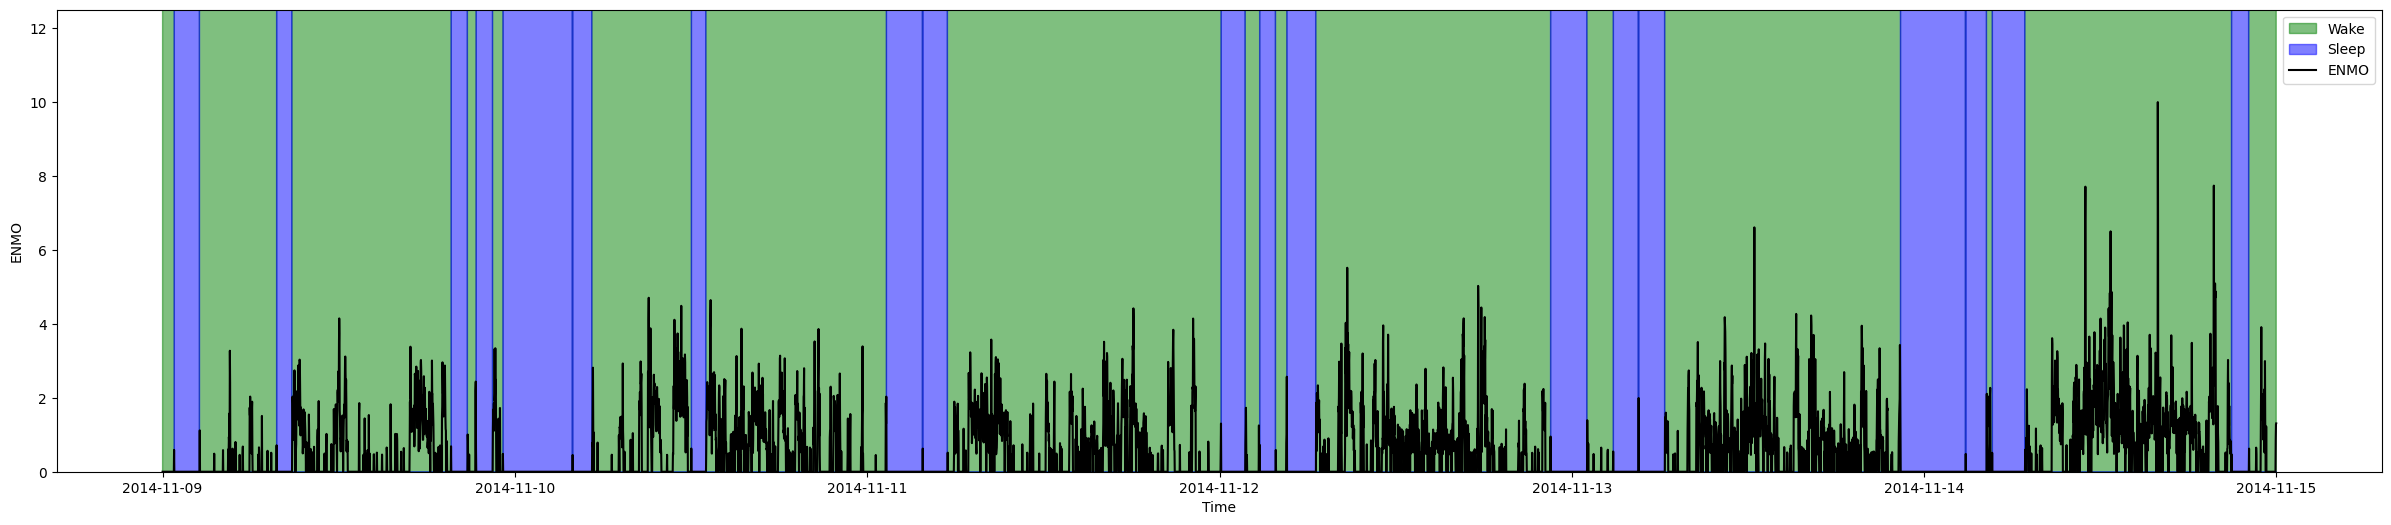

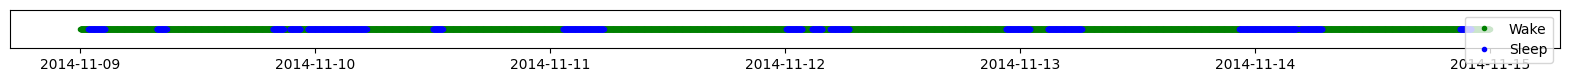

In [7]:
features = WearableFeatures(ukb_loader)
features.run()
plot_sleep_predictions(features, simple=False)
plot_sleep_predictions(features, simple=True)

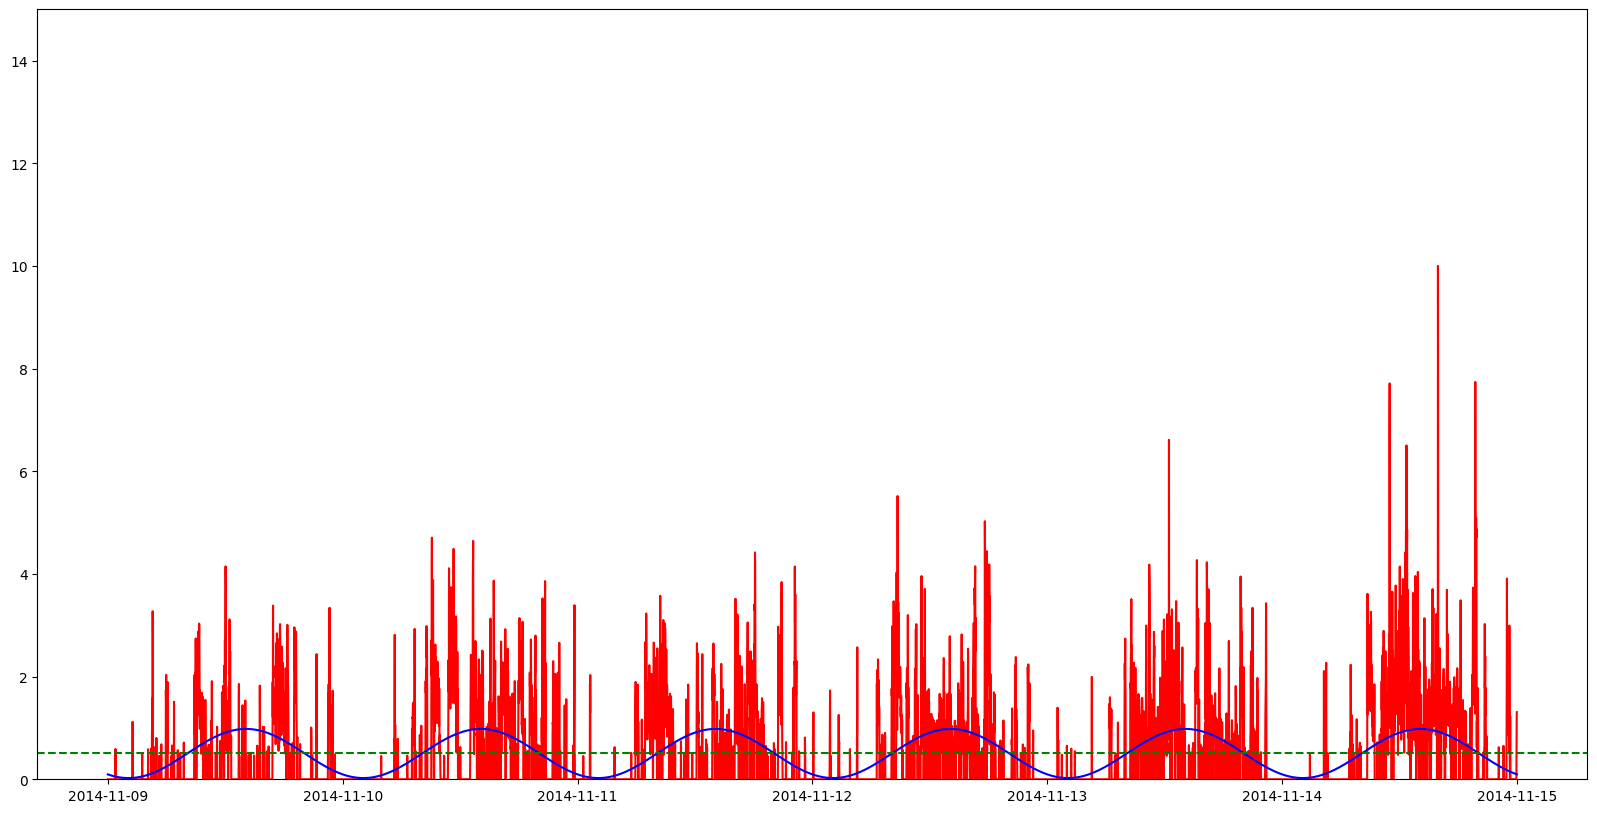

In [8]:
plot_cosinor(features)